In [3]:
# load final.csv to df

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('final.csv')

print(data.head())
print(data.info())



   Country Name  Diabetes Rate  Inactivity Rate  che_gdp  \
0       Algeria      20.333602        29.036757      5.5   
1        Angola      50.005628        17.329948      3.0   
2         Benin      48.271830        18.024012      2.6   
3      Botswana     111.848291        22.275454      6.3   
4  Burkina Faso      47.812368        16.943354      6.4   

   Diabetes Mortality Rate  
0                20.333602  
1                50.005628  
2                48.271830  
3               111.848291  
4                47.812368  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country Name             192 non-null    object 
 1   Diabetes Rate            181 non-null    float64
 2   Inactivity Rate          191 non-null    float64
 3   che_gdp                  189 non-null    float64
 4   Diabetes Mortality Rate  181 non

<AxesSubplot:>

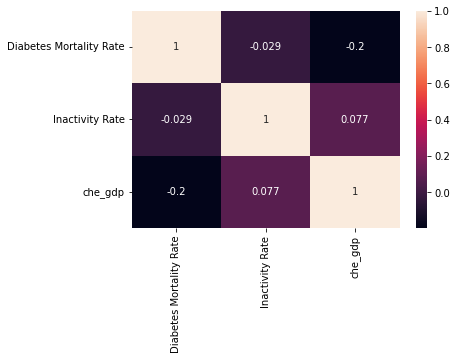

In [4]:
# plot a correlation matrix between death of diabetes, physical inactivity and che_gdp

sns.heatmap(data[['Diabetes Mortality Rate', 'Inactivity Rate', 'che_gdp']].corr(), annot=True)

[[0.56682929 0.80944261 0.15332065]
 [0.94335299 0.32692837 0.05659481]
 [0.93563508 0.34935277 0.05039484]
 [0.9792462  0.19502447 0.05515731]
 [0.93515262 0.3313917  0.12517633]]
For k=2, Davies-Bouldin score is 0.5465422471024206
For k=3, Davies-Bouldin score is 0.6032241533585391
For k=4, Davies-Bouldin score is 0.837705214950629
For k=5, Davies-Bouldin score is 0.7408669769667814
For k=6, Davies-Bouldin score is 0.7290191897454968
For k=7, Davies-Bouldin score is 0.7684525008994594
For k=8, Davies-Bouldin score is 0.838738038876487
For k=9, Davies-Bouldin score is 0.8086202100553147
For k=10, Davies-Bouldin score is 0.7173018495816574


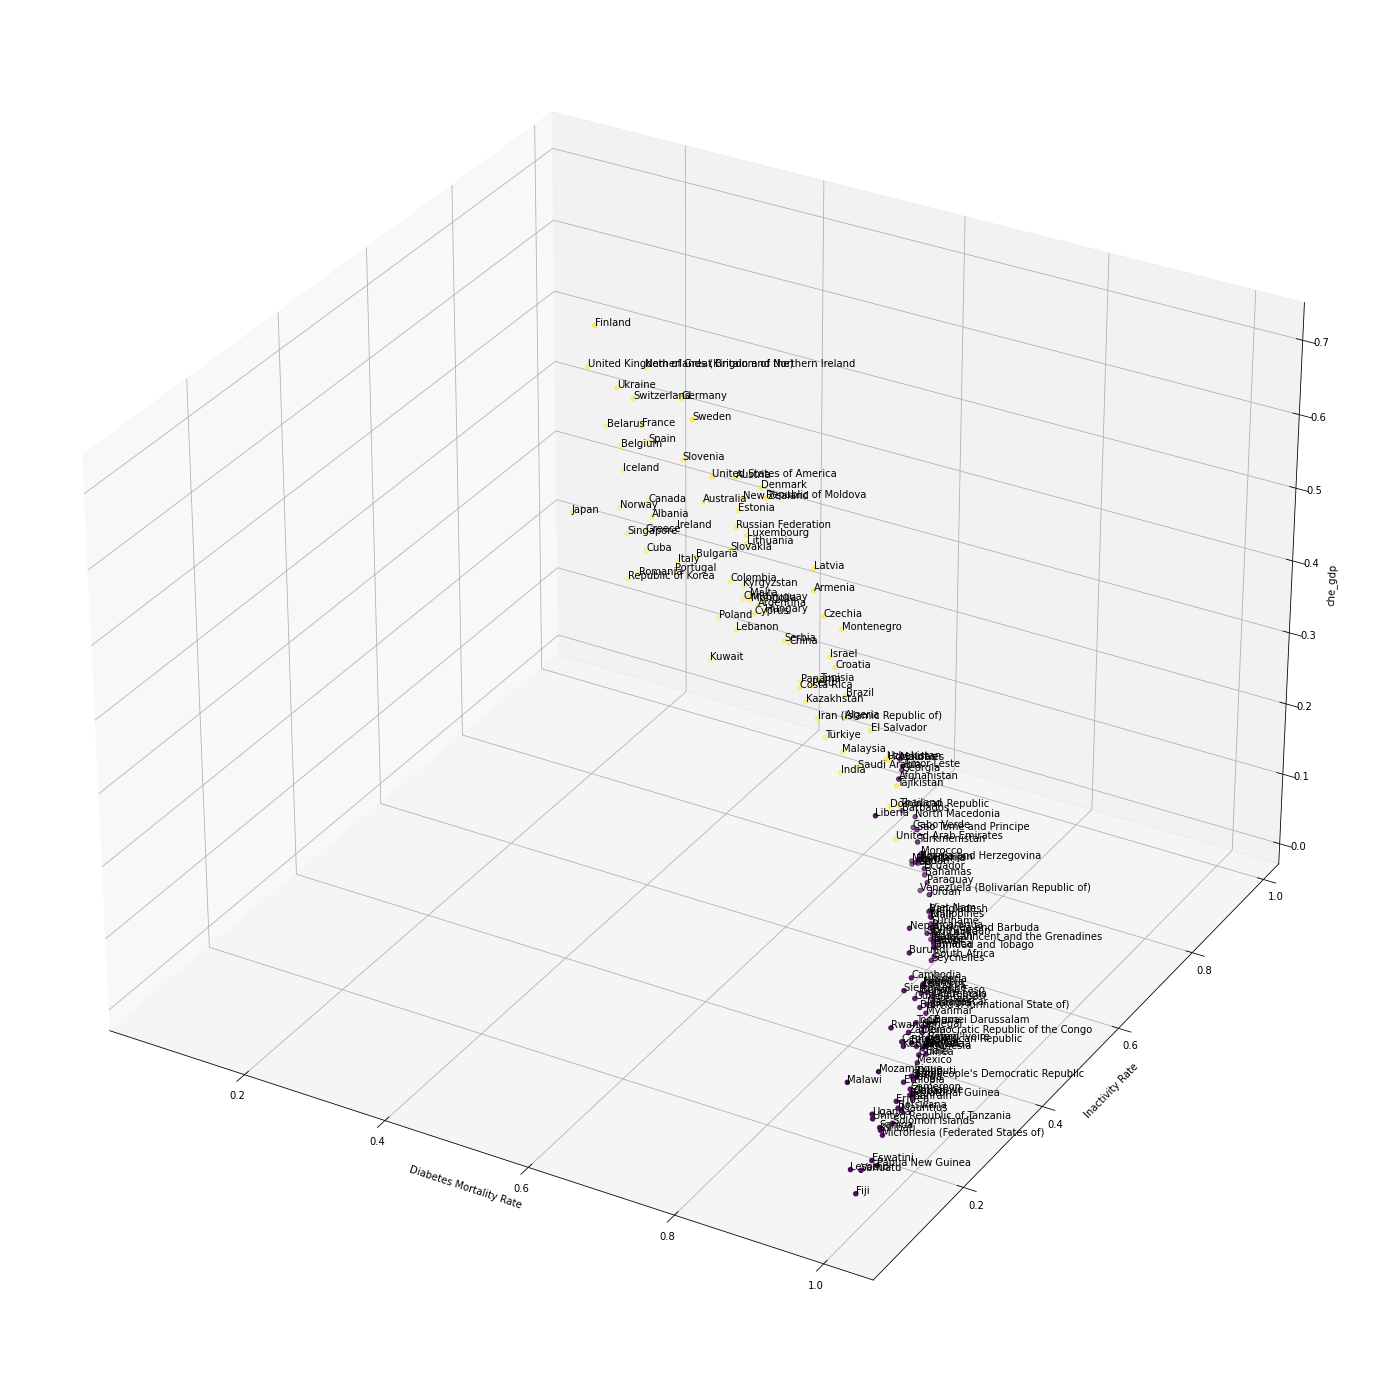

In [5]:
# Remove NaN values from che_gdp and Diabetes Mortality Rate and Inactivity Rate

data = data.dropna(subset=['che_gdp', 'Diabetes Mortality Rate', 'Inactivity Rate'])

# Normalize Inactivity Rate and che_gdp and Diabetes Mortality Rate using Normalize from sklearn

from sklearn.preprocessing import normalize

data_normalized = normalize(data[['Diabetes Mortality Rate', 'Inactivity Rate', 'che_gdp']])

#plot 5 first rows of data_normalized

print(data_normalized[:5])

# Perform KMeans clustering on the normalized data

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(data_normalized)

# Plot 3D scatter plot of the data with the points colored according to the cluster they belong to

fig = plt.figure(figsize=(25, 25))

ax = fig.add_subplot(111, projection='3d')
#plot the clusters for the normalized data
# and print all countries and which cluster they belong to (purple or yellow)

ax.scatter(data_normalized[:,0], data_normalized[:,1], data_normalized[:,2], c=kmeans.labels_, cmap='viridis')

for i, txt in enumerate(data['Country Name']):
    ax.text(data_normalized[i,0], data_normalized[i,1], data_normalized[i,2], txt)




ax.set_xlabel('Diabetes Mortality Rate')
ax.set_ylabel('Inactivity Rate')
ax.set_zlabel('che_gdp')

# Loop over different values of k and compute the KMeans clustering and Davies-Bouldin score

from sklearn.metrics import davies_bouldin_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_normalized)
    score = davies_bouldin_score(data_normalized, kmeans.labels_)
    print(f'For k={k}, Davies-Bouldin score is {score}')



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

data_clean = data[['Diabetes Mortality Rate', 'Inactivity Rate', 'che_gdp']].dropna()

# Step 2: Define dependent and independent variables
X = data_clean[['Inactivity Rate', 'che_gdp']]  # Independent variables
y = data_clean['Diabetes Mortality Rate']        # Dependent variable

# Step 3: Train-test split (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit the regression model using sklearn
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 5: Make predictions on test set
y_pred = regressor.predict(X_test)

# Step 6: Evaluate the model
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)

# Metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared score:', regressor.score(X_test, y_test))

# Step 7: Use statsmodels for a detailed summary
X_sm = sm.add_constant(X_train)  # Adding constant for intercept
model = sm.OLS(y_train, X_sm).fit()
print(model.summary())


Intercept: 51.7970022356603
Coefficients: [ 0.18550729 -1.97354498]
Mean Absolute Error (MAE): 28.173293134564858
Mean Squared Error (MSE): 1849.21537362005
Root Mean Squared Error (RMSE): 43.002504271496214
R-squared score: 0.013172429918636763
                               OLS Regression Results                              
Dep. Variable:     Diabetes Mortality Rate   R-squared:                       0.026
Model:                                 OLS   Adj. R-squared:                  0.012
Method:                      Least Squares   F-statistic:                     1.871
Date:                     Fri, 04 Oct 2024   Prob (F-statistic):              0.158
Time:                             10:36:26   Log-Likelihood:                -723.22
No. Observations:                      142   AIC:                             1452.
Df Residuals:                          139   BIC:                             1461.
Df Model:                                2                                        